## ML Project: Payment Transaction Data From Online Casino Players

Dataset to download: https://raw.githubusercontent.com/nahcol10/Online_Casino/refs/heads/main/Online_casino_DIB.csv

In [47]:
# Data management
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  
from datetime import datetime as dt

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [48]:
casino = pd.read_csv("Online_casino_DIB.csv")
casino.head()

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier
0,2019-07-05T05:02:28+0000,LOYALTYCARDDEBIT,10.0,APPROVED,customer1734
1,2019-07-05T05:26:00+0000,LOYALTYCARDDEBIT,10.0,APPROVED,customer1734
2,2019-07-05T04:54:35+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734
3,2019-07-05T05:02:27+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734
4,2019-07-05T05:25:59+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734


In [49]:
casino.dtypes

ReqTimeUTC            object
TransactionType       object
TransactionAmount    float64
Status                object
AccountIdentifier     object
dtype: object

In [50]:
#
casino.ReqTimeUTC = pd.to_datetime(casino.ReqTimeUTC)

In [51]:
casino.describe(exclude = 'float64')

,ReqTimeUTC,TransactionType,Status,AccountIdentifier
count,138928,138928,138928,138928
unique,NaN,3,2,2361
top,NaN,LOYALTYCARDDEBIT,APPROVED,customer10
freq,NaN,70329,133520,2318
mean,2019-08-23 14:37:01.511898112+00:00,NaN,NaN,NaN
min,2019-03-01 08:03:23+00:00,NaN,NaN,NaN
25%,2019-05-19 06:27:26.249999872+00:00,NaN,NaN,NaN
50%,2019-08-21 13:32:02.500000+00:00,NaN,NaN,NaN
75%,2019-11-23 20:28:33.500000+00:00,NaN,NaN,NaN
max,2020-03-02 07:47:06+00:00,NaN,NaN,NaN


In [52]:
casino = casino[casino.ReqTimeUTC <='2020-02-29 00:00:00+00:00'].copy()

In [53]:
casino.TransactionType.unique()

array(['LOYALTYCARDDEBIT', 'LOYALTYCARDCREDITCL', 'LOYALTYCARDCREDIT'],
      dtype=object)

In [54]:
casino.TransactionType = casino.TransactionType.map({'LOYALTYCARDDEBIT':'L2D', 'LOYALTYCARDCREDITCL':'L1D', 'LOYALTYCARDCREDIT':'L2W'})

<Axes: xlabel='ReqTimeUTC', ylabel='Density'>

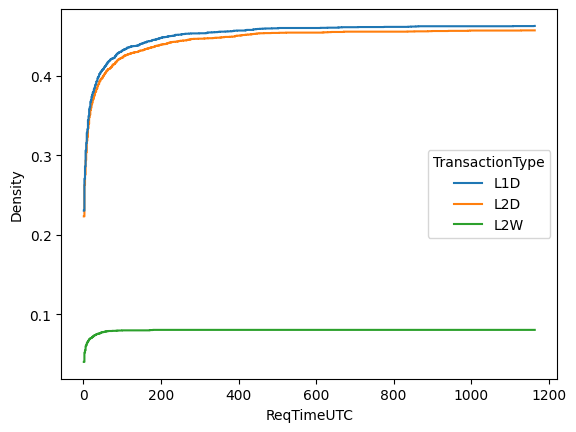

In [42]:
user_type_ = casino.groupby(["AccountIdentifier", "TransactionType"]).count().reset_index()
# sns.histplot(data = user_type_, x="ReqTimeUTC", bins=50, hue = "TransactionType")

sns.histplot(data = user_type_, x="ReqTimeUTC", hue = "TransactionType", cumulative = True, stat="density", element="step", fill=False)

In [55]:
casino.columns

Index(['ReqTimeUTC', 'TransactionType', 'TransactionAmount', 'Status',
       'AccountIdentifier'],
      dtype='object')

In [56]:
casino = casino[(casino.TransactionType == "L2D") & (casino.Status=="APPROVED")].reset_index(drop=True)
casino = casino[['AccountIdentifier', 'ReqTimeUTC', 'TransactionAmount']]
casino = casino.sort_values(["AccountIdentifier", "ReqTimeUTC"]).reset_index(drop=True)
casino.rename(columns = {'AccountIdentifier':'user', 'ReqTimeUTC':'timest',  'TransactionAmount':'amount'}, inplace=True)
casino.head()

In [60]:
casino.head()

,user,timest,amount
0,customer1,2019-03-01 17:24:43+00:00,30.0
1,customer1,2019-03-01 19:54:04+00:00,50.0
2,customer1,2019-03-01 22:44:15+00:00,40.0
3,customer1,2019-03-02 02:44:20+00:00,100.0
4,customer1,2019-03-02 18:28:39+00:00,25.0


In [12]:
top_20_freq = casino.groupby("AccountIdentifier").count().reset_index().iloc[:,0:2].sort_values("ReqTimeUTC")[::-1][0:20]
top_20_spenders = casino[["AccountIdentifier", "TransactionAmount"]].groupby("AccountIdentifier").sum().reset_index().sort_values("TransactionAmount")[::-1][0:20]
# top_20_spenders

<Axes: xlabel='TransactionAmount', ylabel='AccountIdentifier'>

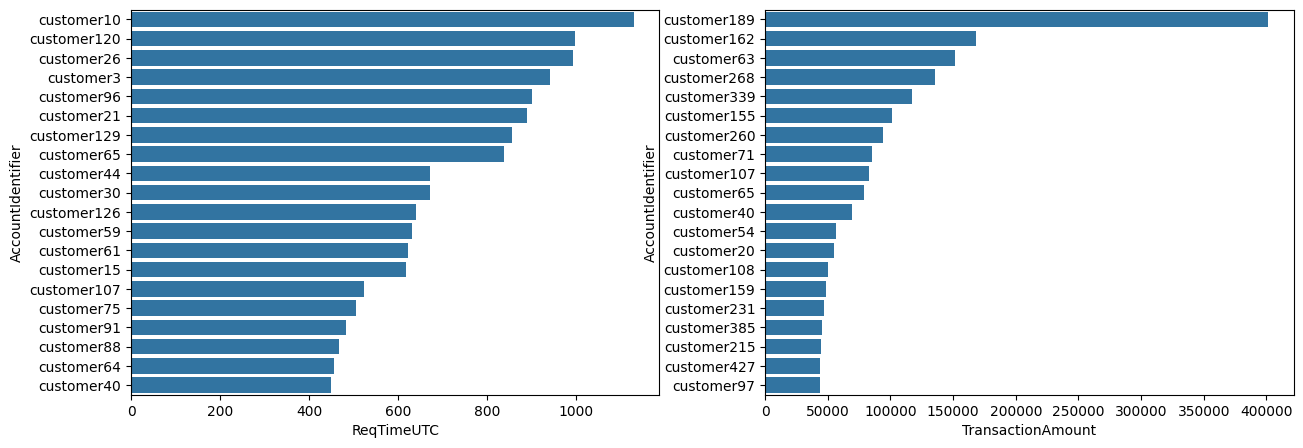

In [13]:
fig, ax = plt.subplots(ncols = 2, figsize=(15, 5))

sns.barplot(top_20_freq, x = 'ReqTimeUTC', y = 'AccountIdentifier', ax = ax[0])
sns.barplot(top_20_spenders, x ="TransactionAmount", y = "AccountIdentifier", ax = ax[1])

In [14]:
casino["hour"] = casino.ReqTimeUTC.dt.hour
casino["day_of_week"] = casino.ReqTimeUTC.dt.day_of_week
day_of_week_dict = {0: "1_Monday", 1:"2_Tuesday", 2:"3_Wednesday", 3:"4_Thursday", 4:"5_Friday", 5:"6_Saturday", 6:"7_Sunday"}
casino["day_of_week"] = casino["day_of_week"].map(day_of_week_dict)
casino

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier,hour,day_of_week
0,2019-07-05 05:02:28+00:00,L2D,10.0,APPROVED,customer1734,5,5_Friday
1,2019-07-05 05:26:00+00:00,L2D,10.0,APPROVED,customer1734,5,5_Friday
2,2019-07-05 04:54:37+00:00,L2D,10.0,APPROVED,customer1734,4,5_Friday
3,2020-02-02 06:50:37+00:00,L2D,50.0,APPROVED,customer935,6,7_Sunday
4,2019-12-13 12:29:32+00:00,L2D,100.0,APPROVED,customer935,12,5_Friday
...,...,...,...,...,...,...,...
69729,2020-02-12 10:54:47+00:00,L2D,10.0,APPROVED,customer1576,10,3_Wednesday
69730,2019-08-24 21:32:43+00:00,L2D,10.0,APPROVED,customer1874,21,6_Saturday
69731,2019-11-01 06:51:07+00:00,L2D,30.0,APPROVED,customer1994,6,5_Friday
69732,2019-05-23 20:02:49+00:00,L2D,10.0,APPROVED,customer2215,20,4_Thursday


<Axes: xlabel='hour', ylabel='day_of_week'>

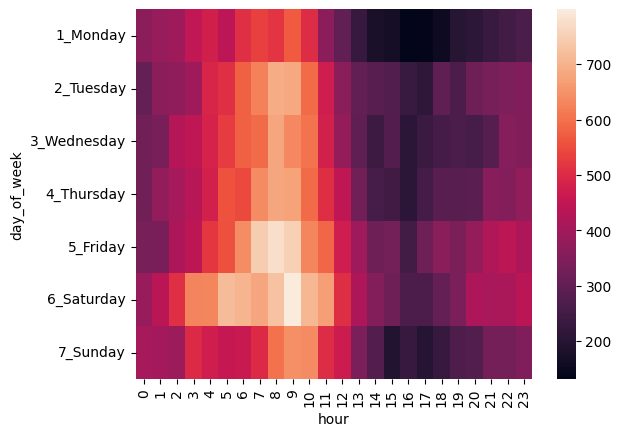

In [15]:
h_d_g = casino[["hour", "day_of_week", "TransactionType"]].groupby(["hour", "day_of_week"]).count().reset_index()
casino_hm = pd.pivot_table(h_d_g, values="TransactionType", index="day_of_week", columns="hour")
sns.heatmap(casino_hm)

In [16]:
# casino["ReqDateUTC"] = casino.ReqTimeUTC.dt.to_period('D')
casino["ReqDateUTC"] = casino.ReqTimeUTC.dt.floor('D')

daily_activity = casino.groupby(["AccountIdentifier", "ReqDateUTC"]).agg({'TransactionAmount': 'sum', 'TransactionType':'count'})\
    .reset_index()

daily_activity

,AccountIdentifier,ReqDateUTC,TransactionAmount,TransactionType
0,customer1,2019-03-01 00:00:00+00:00,120.0,3
1,customer1,2019-03-02 00:00:00+00:00,125.0,2
2,customer1,2019-03-03 00:00:00+00:00,200.0,2
3,customer1,2019-03-04 00:00:00+00:00,160.0,3
4,customer1,2019-03-05 00:00:00+00:00,240.0,3
...,...,...,...,...
28600,customer996,2019-03-14 00:00:00+00:00,25.0,1
28601,customer996,2019-09-13 00:00:00+00:00,25.0,2
28602,customer997,2019-09-22 00:00:00+00:00,50.0,1
28603,customer998,2019-11-09 00:00:00+00:00,50.0,2


<Axes: xlabel='ReqDateUTC', ylabel='TransactionAmount'>

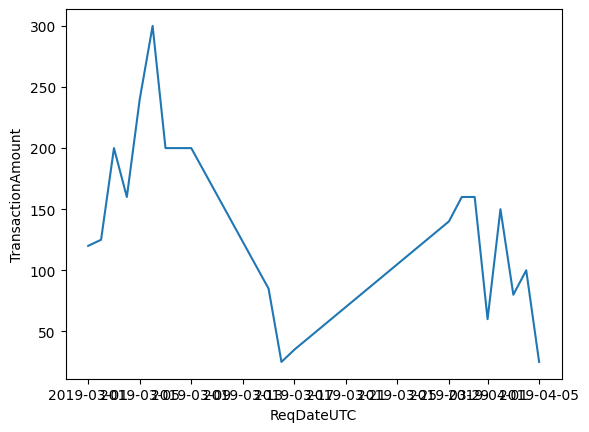

In [17]:
c1 = daily_activity[daily_activity.AccountIdentifier=="customer1"][0:20]
sns.lineplot(c1, x="ReqDateUTC", y="TransactionAmount")

In [19]:
full_customer_df = pd.DataFrame()

for customer_id in daily_activity.AccountIdentifier.unique():
    customer_df = daily_activity[daily_activity.AccountIdentifier == customer_id]

    full_range = pd.date_range(customer_df.ReqDateUTC.min(), customer_df.ReqDateUTC.max(), freq="D")

    customer_df = customer_df.set_index(keys = "ReqDateUTC")

    customer_df = customer_df.reindex(list(full_range), fill_value=0)
    customer_df.AccountIdentifier = [customer_id]*len(customer_df)
    
    customer_df = customer_df.reset_index()
    full_customer_df = pd.concat([full_customer_df, customer_df])

full_customer_df = full_customer_df.reset_index(drop=True)

In [20]:
full_customer_df

,ReqDateUTC,AccountIdentifier,TransactionAmount,TransactionType
0,2019-03-01 00:00:00+00:00,customer1,120.0,3
1,2019-03-02 00:00:00+00:00,customer1,125.0,2
2,2019-03-03 00:00:00+00:00,customer1,200.0,2
3,2019-03-04 00:00:00+00:00,customer1,160.0,3
4,2019-03-05 00:00:00+00:00,customer1,240.0,3
...,...,...,...,...
164651,2019-09-12 00:00:00+00:00,customer996,0.0,0
164652,2019-09-13 00:00:00+00:00,customer996,25.0,2
164653,2019-09-22 00:00:00+00:00,customer997,50.0,1
164654,2019-11-09 00:00:00+00:00,customer998,50.0,2


In [21]:
full_customer_df["month"] = full_customer_df.ReqDateUTC.dt.to_period("M")

customer_month = full_customer_df.groupby(["month", "AccountIdentifier"]).count().reset_index().iloc[:,:2]

start_ = customer_month.groupby("AccountIdentifier").min().reset_index()
end_ = customer_month.groupby("AccountIdentifier").max().reset_index()

start_end_df = pd.merge(start_, end_ , on = "AccountIdentifier")
start_end_df

source_target_value = start_end_df.groupby(["month_x", "month_y"]).count().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_9816\766865895.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_customer_df["month"] = full_customer_df.ReqDateUTC.dt.to_period("M")


In [22]:
source_target_value

,month_x,month_y,AccountIdentifier
0,2019-03,2019-03,276
1,2019-03,2019-04,58
2,2019-03,2019-05,49
3,2019-03,2019-06,33
4,2019-03,2019-07,27
...,...,...,...
73,2019-12,2020-01,17
74,2019-12,2020-02,30
75,2020-01,2020-01,134
76,2020-01,2020-02,38


In [23]:

le = LabelEncoder()
le.fit_transform(source_target_value.month_x.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [47]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 100,
      thickness = 10,
      line = dict(color = "gray", width = 0.5),
      # label = ["3", "4", "5", "6","7", "8", "9", "10", "11", "12", "1", "2"],
      label = ["Mar", "Apr", "May", "Jun","Jul",\
        "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"],
      color = "orange"
    ),
    link = dict(
      source =le.transform(source_target_value.month_x.tolist()),
      target = le.transform(source_target_value.month_y.tolist()),
      value = source_target_value.AccountIdentifier.tolist(),
      hovercolor=["black"],
  ))])

fig.update_layout(title_text="Customer Lifetime: March 2023 - February 2024", font_size=10)
fig.show()

In [25]:
fast_quiter_ = source_target_value[source_target_value.month_x == source_target_value.month_y]
source_target_value = source_target_value[source_target_value.month_x != source_target_value.month_y]

In [26]:
tc_df = customer_month.groupby("month").count().reset_index()
tc_df

,month,AccountIdentifier
0,2019-03,743
1,2019-04,672
2,2019-05,699
3,2019-06,669
4,2019-07,660
5,2019-08,624
6,2019-09,594
7,2019-10,572
8,2019-11,555
9,2019-12,563


In [27]:
fq_df = fast_quiter_[["month_x", "AccountIdentifier"]]
fq_df

,month_x,AccountIdentifier
0,2019-03,276
12,2019-04,92
23,2019-05,105
33,2019-06,82
42,2019-07,94
50,2019-08,80
57,2019-09,70
63,2019-10,62
68,2019-11,65
72,2019-12,87


In [28]:
q_t = pd.merge(tc_df, fq_df, right_on = "month_x", left_on = "month")[["month","AccountIdentifier_x", "AccountIdentifier_y"]]

q_t.rename(columns = {"month": "month","AccountIdentifier_x":"total", "AccountIdentifier_y":"quit"}, inplace=True)   
q_t


,month,total,quit
0,2019-03,743,276
1,2019-04,672,92
2,2019-05,699,105
3,2019-06,669,82
4,2019-07,660,94
5,2019-08,624,80
6,2019-09,594,70
7,2019-10,572,62
8,2019-11,555,65
9,2019-12,563,87


<Axes: xlabel='month', ylabel='value'>

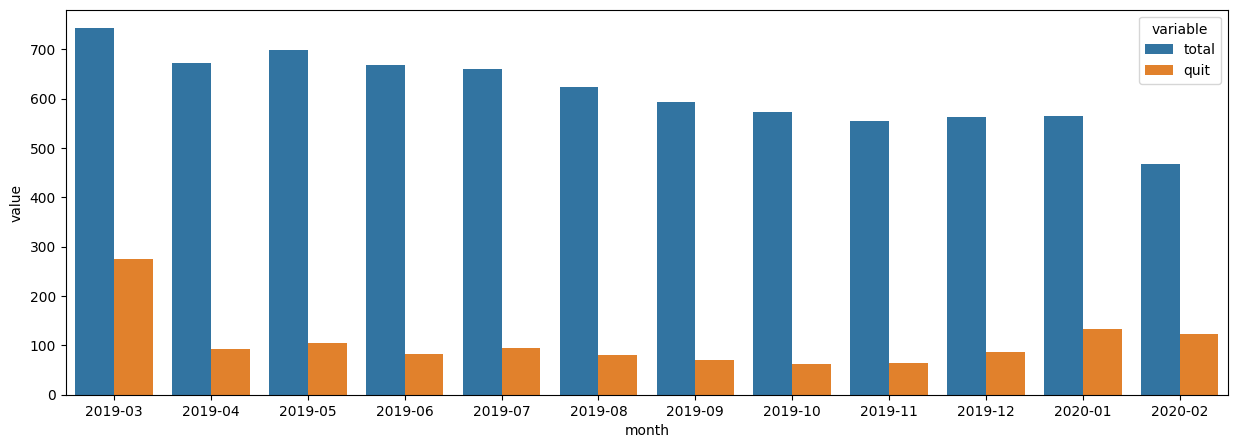

In [168]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(q_t.melt(id_vars = ["month"]), x = "month", y="value", hue = "variable")